# PIA Aeroelasticidad


Consider the data provided for the following truck. Answer the provided questions. Validate and justify your reasonings and assumptions using sketches, drawings, equations, etc. In all the questions, provide a valid discussion of the results and comparison if applicable.

<img src="Camioneta.jpg" width="350" height="350">
<img src="Esf-def.jpg" width="550" height="550">
<img src="Tabla de datos.jpg">

1. Estimate the equivalent fundamental natural frequency for the vehicle without load and the vehicle fully loaded. Assume an initial (reasonable) deflection for the vehicle SDOF equivalent model.

In [105]:
import numpy as np
import matplotlib.pyplot as plt  #plotting module
%matplotlib inline
from math import sqrt,atan

#Parameters given
mass_tot = 1900              #kg
gross_mass = 2545            #kg
k_susp_front = 94000           #N/m
k_susp_rear = 29650            #N/m
k_tyre_front = 36300           #N/m
k_tyre_rear = 29530            #N/m
TR_front = 2                   #motion rate
TR_rear = 1.2                  #motion rate
mass_dist_front = 0.6          #mass distribution percentage
mass_dist_rear = 0.4          #mass distribution percentage

# Fully load data: calcualitng the spring constant when fully load

x1 = 65.5109
x2 = 81.2725
y1 = 6599.24
y2 = 7771.12

k_fullyload = (x2-x1)/(y2-y1)

For the first part of obtaining the natural frequency of the system, the springs are arrange in a parallel way so, the total K would be:

$k_{tot} = 2k_1 + 2k_2$

Since the distribution of masses is almost very similar to the half-half distribution, this part will be omitted and taken as an equal distribution

And the masses to be used are the gross (fully loaded) and the total of the vehicle which is the one unloaded.

$\omega_{ntot} = \sqrt{\frac{2k_{front} + 2k_{rear}}{m_{tot}}}$ $\;\;\;\;\&\;\;\;\;\;\;$
$\omega_{nfull} = \sqrt{\frac{2k_{front} + 2k_{fullyload}}{m_{gross}}}$

In [106]:
#Calculating natural frequency loaded and unloaded
omega_ntot = sqrt((2*k_susp_front + 2*k_susp_rear)/mass_tot)
omega_nfull = sqrt((2*k_susp_front + 2*k_fullyload)/gross_mass)

Now assuming initial conditions will permit graphically represent the response of the system. The average height of a speed bump is 152mm. So this will permit to simulate the suspension passing a bump with a considerable speed so the "initial point" is at the top of the bump. And a very small velocity because the code was having some problems calculating the phase angle.

In [107]:
# Set up simulation parameters
t = np.linspace(0, 10, 501)         

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0.152, 0.000001])  #[m, m/s]

2. Estimate (plot) the free response for the cases studied in 1.

Remembering that for free response:

$x(t)=Asin(\omega_n t)+Bcos(\omega_n t)$

Most general solution, $A,$ $B$ constants depend upon Initial Conditions of the system. Evaluating the response and its derivative at $t=0$ gives the particular solution:

$x(t)=\frac{\dot{x_0}}{\omega_n}sin(\omega_n t)+x_0cos(\omega_n t)$

Which can also be expressed as:

$x(t)= Csin(\omega_n t + \phi)$

Considering that C gives the peak amplitude response and $\phi$ is the phase angle:

$C=\sqrt{A^2+B^2}$

$\phi=tan^{-1}\frac{B}{A}$

Results in:

$C=\sqrt{\left(\frac{\dot{x_0}}{\omega_n}\right)^2+x_0^2}=\frac{\sqrt{x_0^2\omega_n^2+\dot{x_o^2}}}{\omega_n}$

$\phi=tan^{-1}\frac{\omega_nx_0}{\dot{x_0}}$

In [108]:
# Calculate amplitude and exponential decay
# First for unloaded vehicle
C_tot = sqrt(x0[0]**2 + ((x0[1])/omega_ntot)**2)
phase_tot = atan(omega_ntot*x0[0]/x0[1]) 
x_t_tot = C_tot * np.sin(omega_ntot*t+phase_tot)

# then for fully load vehicle
C_full = sqrt(x0[0]**2 + ((x0[1])/omega_nfull)**2)
phase_full = atan(omega_nfull*x0[0]/x0[1]) 
x_t_full = C_full * np.sin(omega_nfull*t+phase_full)

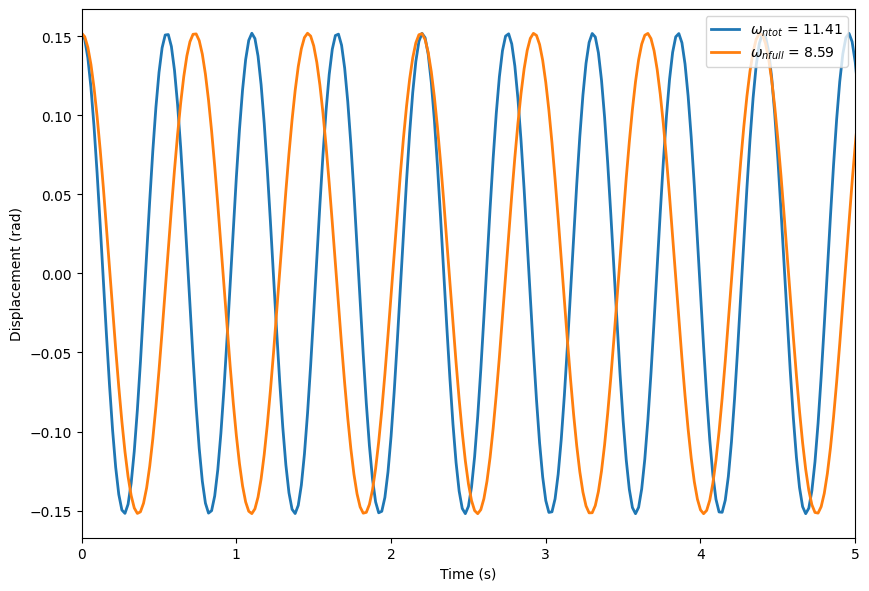

In [109]:
#Plot information
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_tot, linewidth = 2, label = '$\omega_{ntot}$ = %.2f' %(omega_ntot))
plt.plot(t, x_t_full, linewidth = 2, label = '$\omega_{nfull}$ = %.2f' %(omega_nfull))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.xlim(0,5)

# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

3. Investigate the effect of damping in the previous case. Assume three damping cases from 
the measured damping, i.e. a very low value of damping, a high value of damping, and a 
nominal value.

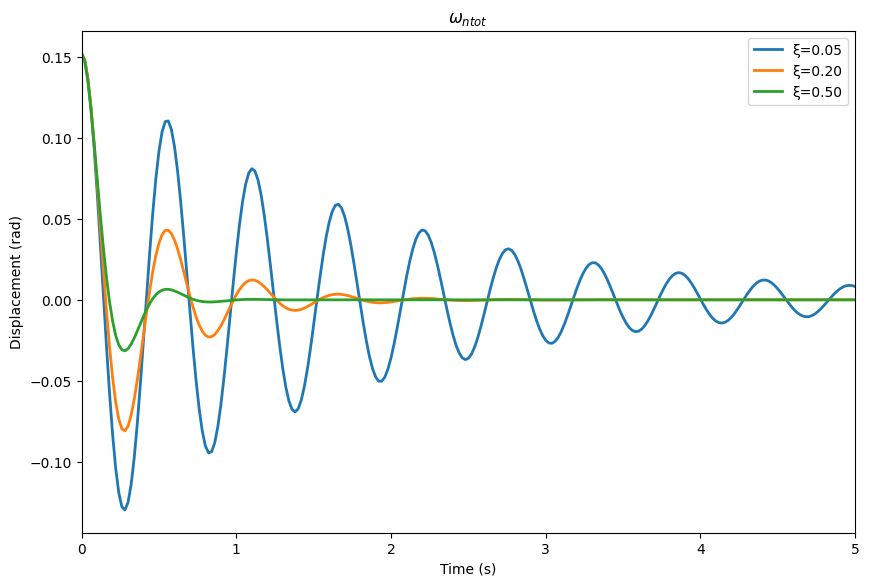

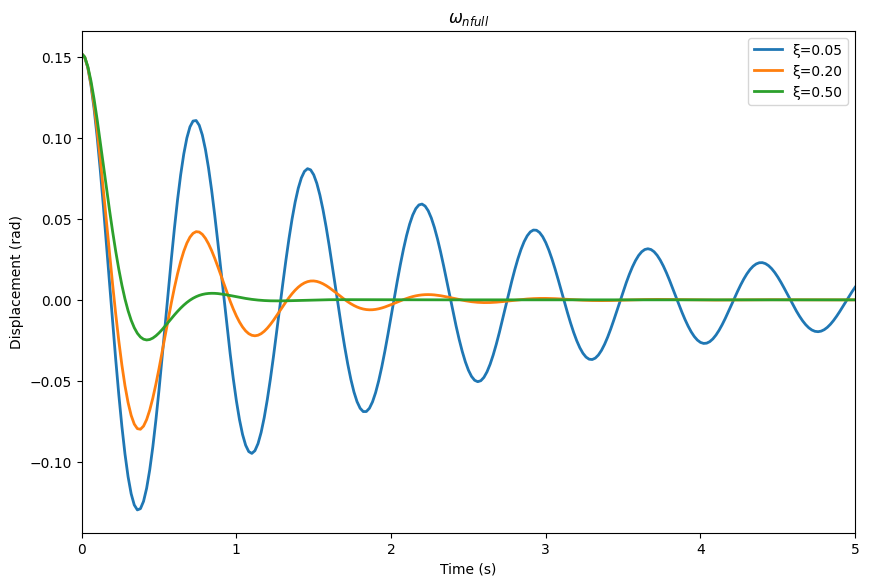

In [110]:
#wntot
#Case 1 low
z = 0.05                                 # Viscous damping ratio
wd = omega_ntot*np.sqrt(1 - z**2)       # Damped natural frequency (rad/s)o
#Case 2 medium
z2 = 0.2                               # Viscous damping ratio
wd2 = omega_ntot*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o
#Case 3 High
z3 = 0.5                                # Viscous damping ratio
wd3 = omega_ntot*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o

# Damped medium response equation 
c_tot_z = sqrt(((x0[1]+z*omega_ntot*x0[0])*2 + (x0[0]*wd)**2) /wd*2)
phase_tot_z = atan((x0[0]*wd)/x0[1]*z*omega_ntot*x0[0])
x_t_tot_z = np.exp(-z*omega_ntot*t)*(x0[0]*np.cos(wd*t) + (z*omega_ntot*x0[0] + x0[1])/wd * np.sin(wd*t))

# Damped low response equation
c_tot_z2 = sqrt(((x0[1]+z2*omega_ntot*x0[0])*2 + (x0[0]*wd2)**2) /wd2*2)
phase_tot_z2 = atan((x0[0]*wd2)/x0[1]*z2*omega_ntot*x0[0])
x_t_tot_z2 = np.exp(-z2*omega_ntot*t)*(x0[0]*np.cos(wd2*t) + (z2*omega_ntot*x0[0] + x0[1])/wd2 * np.sin(wd2*t))

# Damped high response equation
c_tot_z3 = sqrt(((x0[1]+z3*omega_ntot*x0[0])*2 + (x0[0]*wd3)**2) /wd3*2)
phase_tot_z3 = atan((x0[0]*wd3)/x0[1]*z3*omega_ntot*x0[0])
x_t_tot_z3 = np.exp(-z3*omega_ntot*t)*(x0[0]*np.cos(wd3*t) + (z3*omega_ntot*x0[0] + x0[1])/wd3 * np.sin(wd3*t))

#wnfull
#Case 1 Medium
wdf = omega_nfull*np.sqrt(1 - z**2)       # Damped natural frequency (rad/s)o
#Case 2 low
wdf2 = omega_nfull*np.sqrt(1 - z2**2)      # Damped natural frequency (rad/s)o
#Case 3 High
wdf3 = omega_nfull*np.sqrt(1 - z3**2)      # Damped natural frequency (rad/s)o

# Damped medium response equation 
C_full_z = sqrt(((x0[1]+z*omega_nfull*x0[0])*2 + (x0[0]*wdf)**2) /wdf*2)
phase_full_z = atan((x0[0]*wdf)/x0[1]*z*omega_nfull*x0[0])
x_t_full_z = np.exp(-z*omega_nfull*t)*(x0[0]*np.cos(wdf*t) + (z*omega_nfull*x0[0] + x0[1])/wdf * np.sin(wdf*t))

# Damped low response equation
C_full_z2 = sqrt(((x0[1]+z2*omega_nfull*x0[0])*2 + (x0[0]*wdf2)**2) /wdf2*2)
phase_full_z2 = atan((x0[0]*wdf2)/x0[1]*z2*omega_nfull*x0[0])
x_t_full_z2 = np.exp(-z2*omega_nfull*t)*(x0[0]*np.cos(wdf2*t) + (z2*omega_nfull*x0[0] + x0[1])/wdf2 * np.sin(wdf2*t))

# Damped high response equation
C_full_z3 = sqrt(((x0[1]+z3*omega_nfull*x0[0])*2 + (x0[0]*wdf3)**2) /wdf3*2)
phase_full_z3 = atan((x0[0]*wdf3)/x0[1]*z3*omega_nfull*x0[0])
x_t_full_z3 = np.exp(-z3*omega_nfull*t)*(x0[0]*np.cos(wdf3*t) + (z3*omega_nfull*x0[0] + x0[1])/wdf3 * np.sin(wdf3*t))


#Plot information wntot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_tot_z, linewidth = 2, label = r'ξ=%.2f'%(z))
plt.plot(t, x_t_tot_z2, linewidth = 2, label = r'ξ=%.2f'%(z2))
plt.plot(t, x_t_tot_z3, linewidth = 2, label = r'ξ=%.2f'%(z3))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.title('$\omega_{ntot}$')
plt.xlim(0,5)


# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook


#Plot information wnfull
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_full_z, linewidth = 2, label = r'ξ=%.2f'%(z))
plt.plot(t, x_t_full_z2, linewidth = 2, label = r'ξ=%.2f'%(z2))
plt.plot(t, x_t_full_z3, linewidth = 2, label = r'ξ=%.2f'%(z3))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.title('$\omega_{nfull}$')
plt.xlim(0,5)


# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

4. Considering the values assumed in point 3 (mass and damping), plot the magnitude and 
phase plots of the FRF assuming a SDOF model under harmonic forcing function. Express 
the system equations and the procedure to obtain the FRF

Assuming this is a SDOF

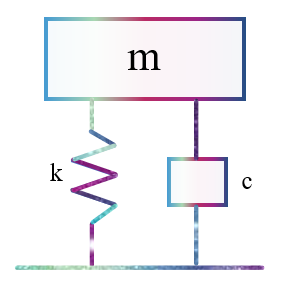


Using complex notation, we know that

$m\ddot{x} + c\dot{x} + kx = F sin(\omega t)$

$x(t)= X e^ {i \omega t}$

$\dot{x(t)}= i \omega X e^ {i \omega t}$

$\ddot{x(t)}= -\omega^2 X e^ {i \omega t}$

$F(t)= F e^ {i \omega t}$

Making a Force analysis of the system

$-m \omega^2 X e^ {i \omega t} +  i c \omega X e^ {i \omega t}+ k X e^ {i \omega t} = F e^ {i \omega t}$

Everything is divided by

$e^ {i \omega t}$

in both sides of the equation

Isolating the x it is obtained

$(-m \omega^2 +  i c \omega + k) X = F $

Then it is obtain that

$ \frac{X}{F} = \frac{1}{(-m \omega^2 +  i c \omega + k)}$




[None, None, None, None, None, None]

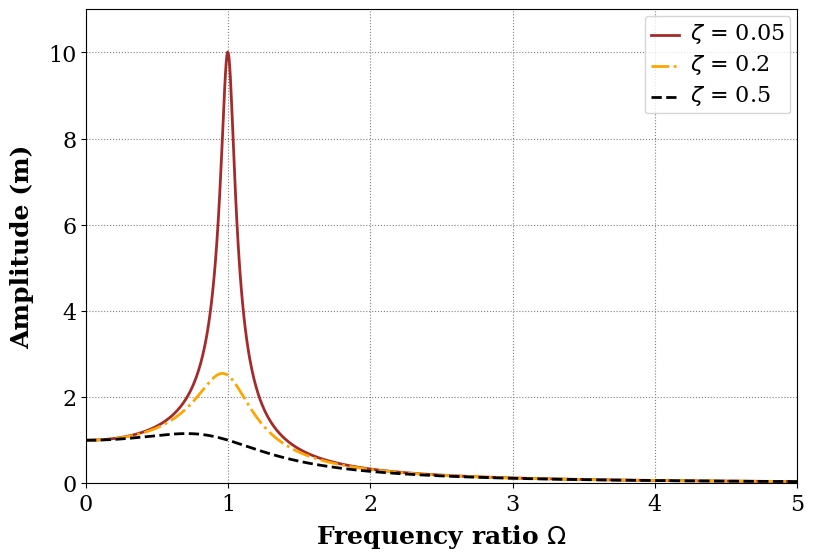

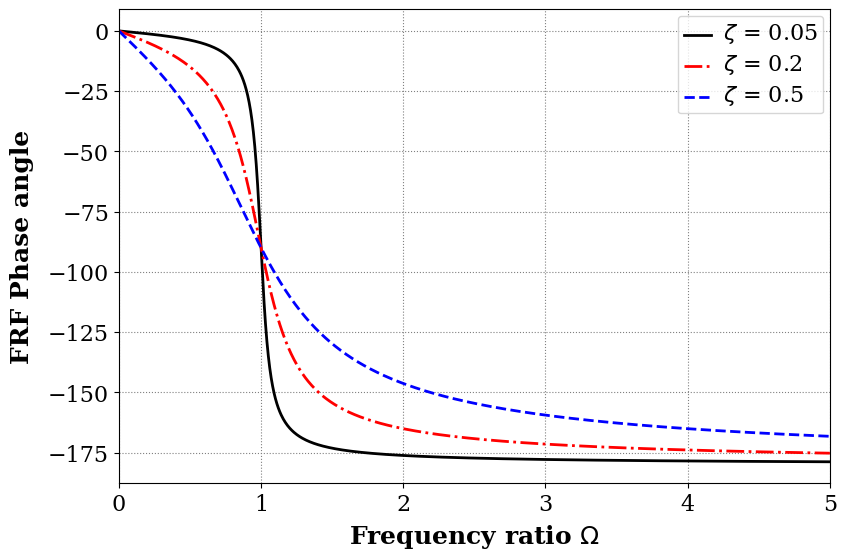

In [111]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np
# Import the plotting module 
import matplotlib.pyplot as plt
# Set up parameters
wr = np.linspace(0,5,1000)          # Frequency ratio range for FRF plot

zeta = z
FRF_mag_01 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_01 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = z2
FRF_mag_05 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_05 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = z3
FRF_mag_1 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_1 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

# Plot the magnitude
# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Amplitude (m)',family='serif',fontsize=18,weight='bold',labelpad=10)
plt.plot(wr, FRF_mag_01,color="brown", linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_mag_05, color="orange",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_mag_1, color="black",linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.5')

#plt.plot(wr, FRF_mag_3, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.3')
plt.xlim(0,5)
plt.ylim(0,11)
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# MAGNITUDE

# Plot the phase

# Change the size of plot
fig = plt.figure(figsize=(9,6))
 
# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('FRF Phase angle',family='serif',fontsize=18,weight='bold',labelpad=10)
plt.plot(wr, FRF_phase_01, color="black",linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_phase_05, color="red",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_phase_1, color="blue",linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.5')

plt.xlim(0,5)
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

5. Assume the vehicle travels through a road defined by a sinusoidal profile as given in the figure. Define the equation of motion transmission as a function of frequency. Find transmitted motion for the following cases and validate the answers graphically. Compare the response of the fully loaded and the unloaded vehicle for three different assumed speeds considering a nominal damping ratio

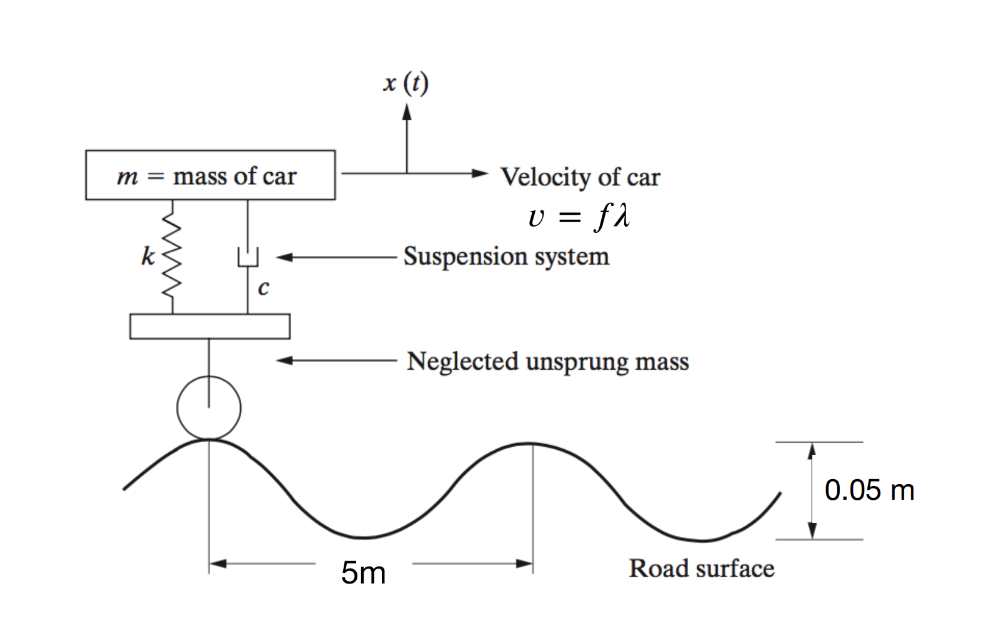

Vibration isolation is defined by the amount of vibration transmitted from a source to a receiver. The ratio of the transmitted force $F_t$ for a system excited by a harmonic external force $F_e$ is defined by:

$TR = \frac{F_e}{F_t}=\frac{k + i \omega c}{k -\omega^2 m + i \omega c}$

Also expressed in nondimensional form as:

$TR = \frac{F_e}{F_t}=\frac{1+i2\zeta \Omega}{1-\Omega^2+i2\zeta \Omega}$

This is called trasmission rato, or tansmissibility. The magnitude is:

$\left|  \frac{F_e}{F_t} \right| =\sqrt{\frac{1 +v(2 \zeta \Omega)^2 }{(1-\Omega^2)^2+(2 \zeta \Omega)^2}}$

According to the image above, the input is a sine vrbation with a wave lenght of 5m, and an amplitude of 0.05m. The frequency of the input will depend directly on the velocity of the car so as the problem suggests the input will be the velocity of the car. As the following:

v1 = 15 m/s
v2 = 25 m/s; this is approximately 100 km/h
v3 = 30 m/s

And following the indications of the image, the amplitude will not change so the frequency of each velocity will be:

$Freq_1 = \frac{v_1}{\lambda} = $ 3 Hz

$Freq_1 = \frac{v_2}{\lambda} = $ 5 Hz

$Freq_1 = \frac{v_3}{\lambda} = $ 6 Hz

In [112]:
# Set up parameters
wr = np.linspace(0,100,1000)          # Frequency ratio range for FRF plot

zeta = z
TR_abs_1 = np.abs((1+1j*2*zeta*wr)/(1-wr**2 + 1j*2*zeta*wr))

zeta = z2
TR_abs_2 = np.abs((1+1j*2*zeta*wr)/(1-wr**2 + 1j*2*zeta*wr))

zeta = z3
TR_abs_3 = np.abs((1+1j*2*zeta*wr)/(1-wr**2 + 1j*2*zeta*wr))

In [116]:
from math import sqrt

# calcualting the amplitude
f_ntot = omega_ntot*(1/(2*3.1416))
f_nfull = omega_nfull*(1/(2*3.1416))
wave_length = 5
v1 = 15
v2 = 25
v3 = 30
f_in1 = v1/wave_length
f_in2 = v2/wave_length
f_in3 = v3/wave_length

# unloaded
r1 = f_in1 / f_ntot
r2 = f_in2 / f_ntot
r3 = f_in3 / f_ntot
TR1 =  sqrt((1+(2*z2*r1)**2)/((1-r1**2)**2 + (2*z2*r1)**2))
TR2 =  sqrt((1+(2*z2*r2)**2)/((1-r2**2)**2 + (2*z2*r2)**2))
TR3 =  sqrt((1+(2*z2*r3)**2)/((1-r3**2)**2 + (2*z2*r3)**2))
TR1_plt = np.linspace(TR1,TR1,1000)
TR2_plt = np.linspace(TR2,TR2,1000)
TR3_plt = np.linspace(TR3,TR3,1000)

# fully loaded
r1_full = f_in1 / f_nfull
r2_full = f_in2 / f_nfull
r3_full = f_in3 / f_nfull
TR1_full =  sqrt((1+(2*z2*r1_full)**2)/((1-r1_full**2)**2 + (2*z2*r1_full)**2))
TR2_full =  sqrt((1+(2*z2*r2_full)**2)/((1-r2_full**2)**2 + (2*z2*r2_full)**2))
TR3_full =  sqrt((1+(2*z2*r3_full)**2)/((1-r3_full**2)**2 + (2*z2*r3_full)**2))
TR1_full_plt = np.linspace(TR1_full,TR1_full,1000)
TR2_full_plt = np.linspace(TR2_full,TR2_full,1000)
TR3_full_plt = np.linspace(TR3_full,TR3_full,1000)

[None, None, None, None, None, None]

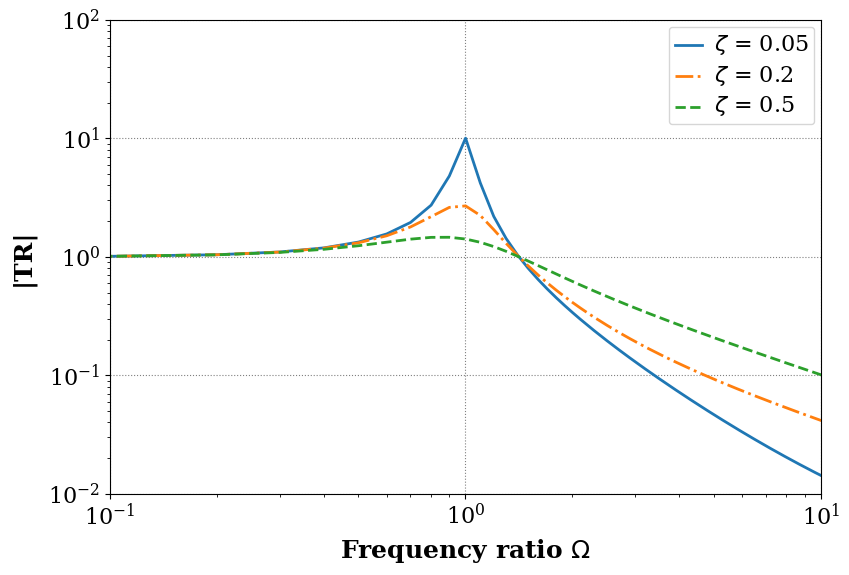

In [114]:
# Plot the magnitude

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('|TR|',family='serif',fontsize=18,weight='bold',labelpad=10)


plt.loglog(wr, TR_abs_1, linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')

plt.loglog(wr, TR_abs_2, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')

plt.loglog(wr, TR_abs_3, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.5')

plt.xlim(0.1,10)
plt.ylim(0.01,100)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

[None, None, None, None, None, None, None, None]

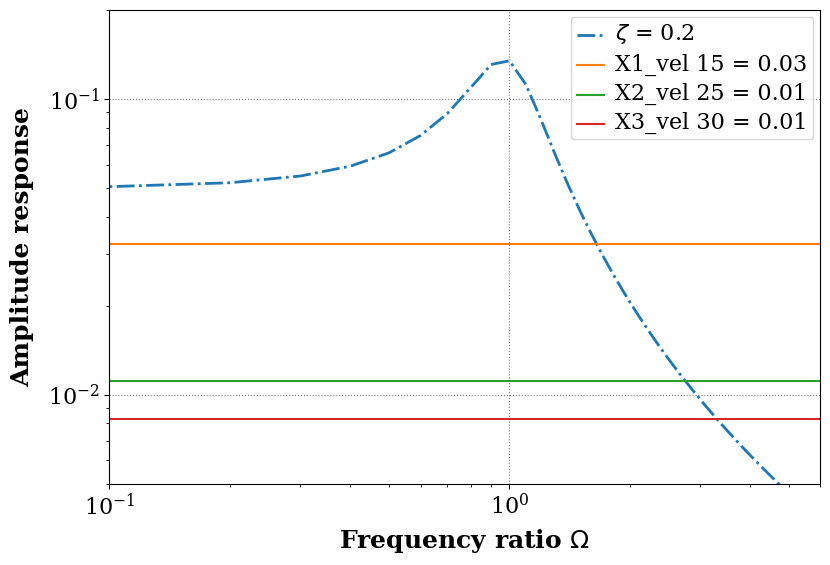

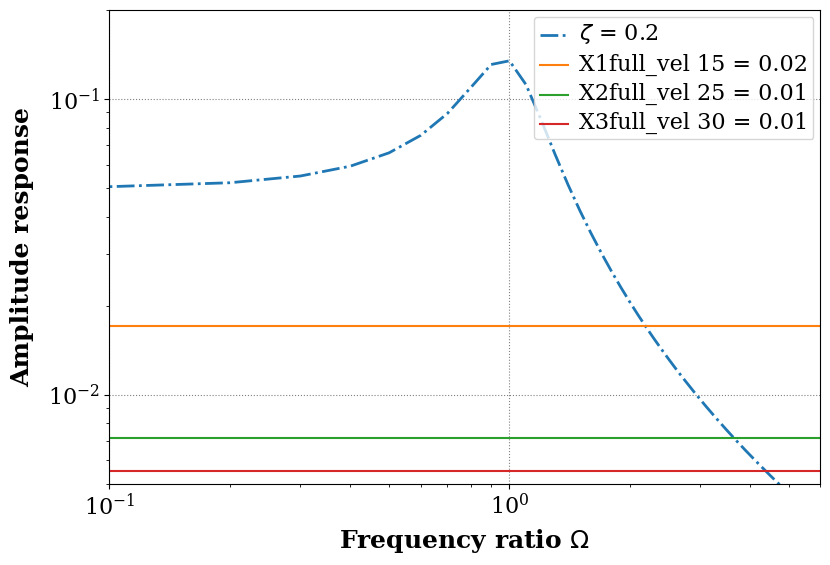

In [118]:
# Plot the magnitude
X_in = 0.05

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Amplitude response',family='serif',fontsize=18,weight='bold',labelpad=10)

amp1 = X_in * TR1_plt
amp2 = X_in * TR2_plt
amp3 = X_in * TR3_plt
amp1_full = X_in * TR1_full_plt
amp2_full = X_in * TR2_full_plt
amp3_full = X_in * TR3_full_plt

plt.loglog(wr, X_in * TR_abs_2, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr,amp1, label = r'X1_vel 15 = %.2f'%(amp1[1]))
plt.plot(wr,amp2, label = r'X2_vel 25 = %.2f'%(amp2[1]))
plt.plot(wr,amp3, label = r'X3_vel 30 = %.2f'%(amp3[1]))

plt.xlim(0.1,6)
plt.ylim(0.005,0.2)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Now fully load

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Amplitude response',family='serif',fontsize=18,weight='bold',labelpad=10)

plt.loglog(wr, X_in * TR_abs_2, linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr,amp1_full, label = r'X1full_vel 15 = %.2f'%(amp1_full[1]))
plt.plot(wr,amp2_full, label = r'X2full_vel 25 = %.2f'%(amp2_full[1]))
plt.plot(wr,amp3_full, label = r'X3full_vel 30 = %.2f'%(amp3_full[1]))

plt.xlim(0.1,6)
plt.ylim(0.005,0.2)

leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

6. Considering the truck as a 2 DOF model with rotation and translation, perform a full modal analysis. Find the equations of motion, solve for the natural frequencies and mode shapes, and plot the modes. Consider a fully loaded and an unloaded vehicle.

A half model of a car is given as representative example. The two degrees of freedom represent the vertical translation degree of freedom and the rotation around the center of gravity (pitch). The model is simplified wither as taking half of the vehicle mass and the stiffness/damper values of the rear and front wheels (one side), and also by assuming an undamped system.

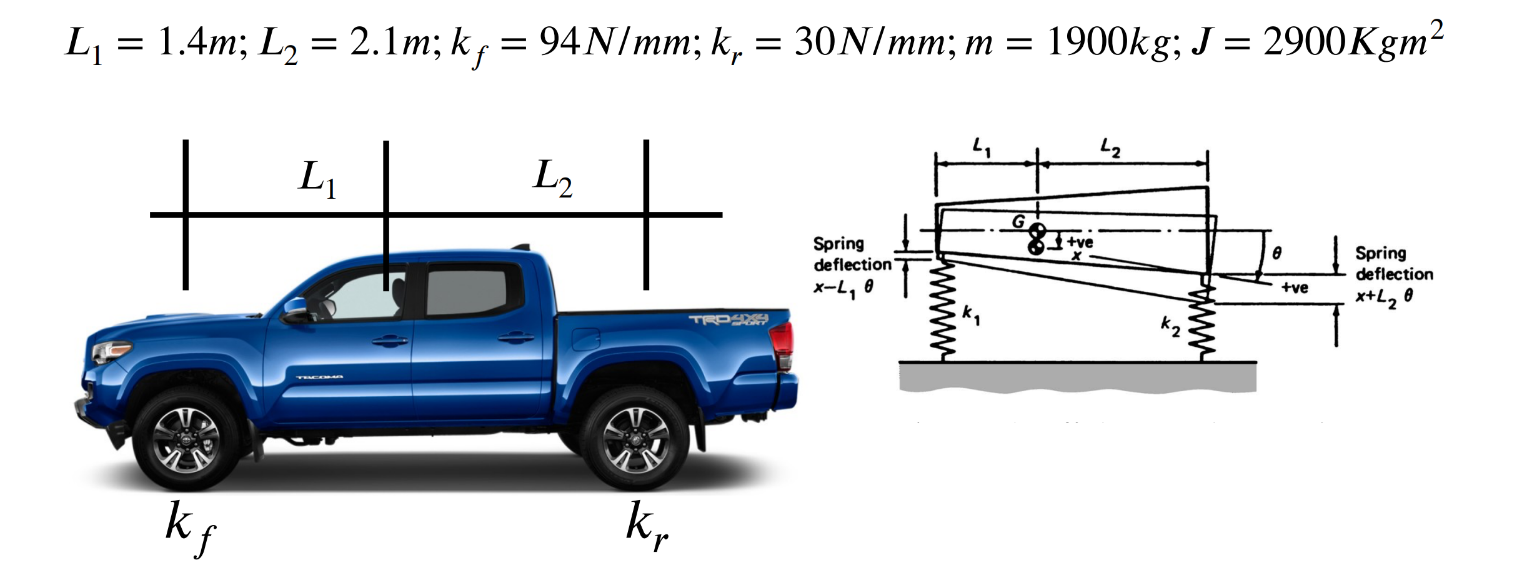

The equations of motion can be obtained using Newton method:

Summing inertial and external forces leads to the first equation:

$\sum F_{inertial}=\sum F_{external}$

$m\ddot{x}=-k_1(x-L_1\theta)-k_2(x+L_2\theta)$

$m\ddot{x}+(k_1+k_2)x-(k_1  L_1 - k_2 L_2)\theta=0$

Following a similar analysis for inertial and external moments leads to the second equation:

$\sum M_{inertial}=\sum M_{external}$


$J_{cg}\ddot{\theta}=k_1(x-L_1\theta)L_1+k_2(x-L_2\theta)L_2$


$J_{cg}\ddot{\theta}-(k_1  L_1 + k_2 L_2)x+(k_1 L_1^2 +k_2 L_2^2)\theta=0$

Then the  equations of motion in matrix form are:

$\left\lbrack \begin{array}{cc}
m & 0\\
0 & J_{\mathrm{cg}} 
\end{array}\right\rbrack \left\lbrack \begin{array}{c}
\ddot{x} \\
\theta^¨ 
\end{array}\right\rbrack + \left\lbrack \begin{array}{cc}
\left.{\left(k\right.}_1 +k_2 \right) & -\left(k_1 L_1 -k_2 L_2 \right)\\
-\left(k_1 L_1 -k_2 L_2 \right) & \left(k_1 L_1^2 +k_2 L_2^2 \right)
\end{array}\right\rbrack \left\lbrack \begin{array}{c}
x\\
\theta 
\end{array}\right\rbrack =0 $

Using complex notation, we know that

$m\ddot{x} + c\dot{x} + kx = F sin(\omega t)$

$x(t)= X e^ {i \omega t}$

$\dot{x(t)}= i \omega X e^ {i \omega t}$

$\ddot{x(t)}= -\omega^2 X e^ {i \omega t}$

In [131]:
from scipy import linalg                  # Import module for linear algebra
# Display plots inline
%matplotlib inline 
import matplotlib.pyplot as plt

To obtain the natural frequencies and mode shapes consider harmonic motion to state the frequency equation as:

$\quad \left[K - \omega^2 M\right]\bar{X} = 0$

To solve it as an eigenvalue problem, where the eigenvalues are the natural frequencies and the eigenvector are the mode shapes.

In [132]:
# Define the system parameters

# unloaded
m = mass_tot                 # kg
J = 2900                # kg
k1 = 94*(1000)                  # N/m 
k2 = 30*(1000)                  # N/m
L1 = 1.4
L2 = 2.1

# Define the mass, stiffness and damping matrices
M = np.asarray([[m, 0],
                [0,  J]])

K = np.asarray([[k1 + k2, -(k1* L1 - k2*L2)],
                [-(k1* L1 - k2*L2),      (k1* L1**2 - k2*L2**2)]])

omega_square, Modal_B = linalg.eigh(K, M)
# The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. 
# The eigenvalues are the square of the two natural frequencies. 
# The eigenvectors are returned mass normalised.

print('The natural frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(omega_square[0]), np.sqrt(omega_square[1])))

print('The modal matrix B is:')
def printArray(Modal_B):
    for row in Modal_B:
        for col in row:
            print("{:8.3f}".format(col), end=" ")
        print("")
printArray(Modal_B)

The natural frequencies are 1.99rad/s and 8.90rad/s.
The modal matrix B is:
  -0.010   -0.021 
  -0.017    0.008 


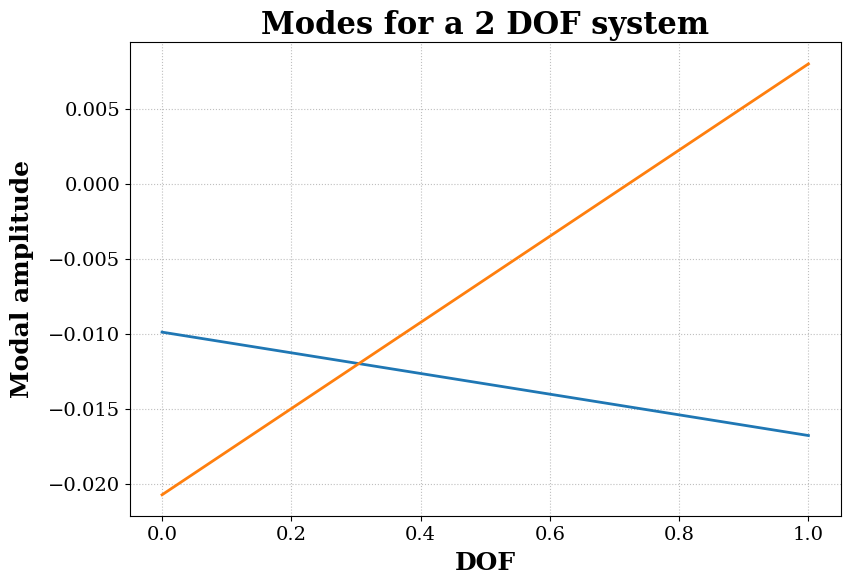

In [133]:
# Plot the modes

# Set format for figure and plot the results

# Set the plot size 
fig = plt.figure(figsize=(9, 6))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Modify the axis units
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=14)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=14)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Activate and edit the grid
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('DOF', family='serif', fontsize=18, weight='bold', labelpad=5)
plt.ylabel('Modal amplitude', family='serif', fontsize=18, weight='bold', labelpad=10)
plt.title("Modes for a 2 DOF system",  family='serif', fontsize=22, weight='bold')

# Plot the response of DOF 1 and 2
plt.plot(Modal_B[:,0],linewidth=2,label=r'Mode 1')
plt.plot(Modal_B[:,1],linewidth=2,label=r'Mode 2')

# uncomment below and set limits if needed

Modal decomposition is performed based on the orthogonality between the modal matrix and the mass and stifness matrices. As a result, the M and K matrices are diagonalized.

$\mathbf{B}^T\mathbf{M}\mathbf{B}=diag(\mathbf{M})_j$


$\mathbf{B}^T\mathbf{K}\mathbf{B}=diag(\mathbf{K})_j$

In [134]:
Mj = np.transpose(Modal_B) @ M @ Modal_B

print('The modal mass is:')
print(Mj)

Kj = np.transpose(Modal_B) @ K @ Modal_B

print('The modal stiffness is:')
print(Kj)


print('The natural frequencies are {:.2f}rad/s and {:.2f}rad/s.'.format(np.sqrt(Kj[0,0]/Mj[0,0]), np.sqrt(Kj[1,1]/Mj[1,1])))

The modal mass is:
[[ 1.00000000e+00 -1.66533454e-16]
 [-1.11022302e-16  1.00000000e+00]]
The modal stiffness is:
[[ 3.97493870e+00 -1.11022302e-14]
 [-3.55271368e-15  7.91985640e+01]]
The natural frequencies are 1.99rad/s and 8.90rad/s.


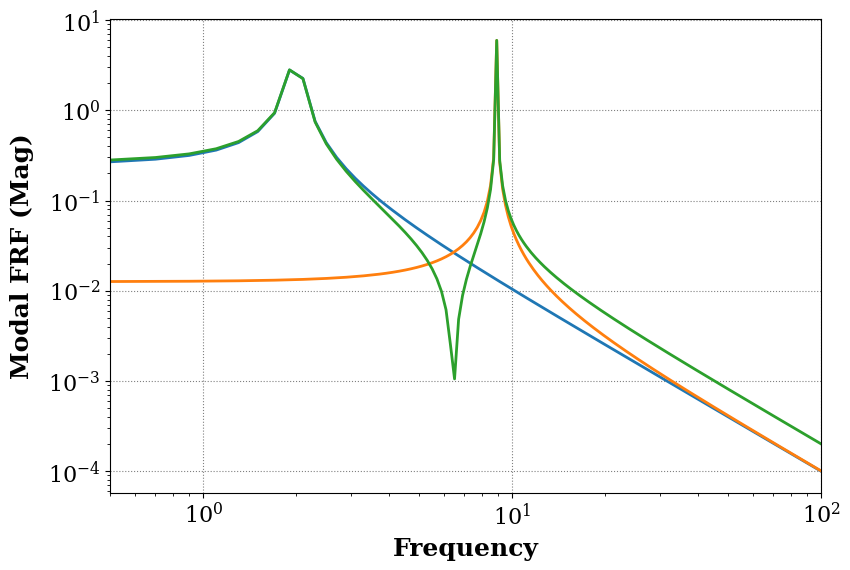

In [138]:
# Calculate and plot modal FRFs

# Extract the modal mass, stiffness and damping

mj=np.diagonal(Mj)
kj=np.diagonal(Kj)

# Define the frequency vector
w = np.linspace(0.1,100,500)
FRF_modal = np.zeros((len(w),2),dtype=complex)

# Calculate modal FRFs

for ii, omega in enumerate(w):
    FRF_modal[ii,:] = (1/(kj-mj*omega**2))

# Summ both modal FRfs

FRF_sum=(FRF_modal[:,0]+FRF_modal[:,1])

# Plot the magnitude

# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Modal FRF (Mag)',family='serif',fontsize=18,weight='bold',labelpad=10)

plt.xlim(0.5,100)

plt.loglog(w,np.abs(FRF_modal[:,0]),linewidth=2,label=r'$\bar{x}$')
plt.loglog(w,np.abs(FRF_modal[:,1]),linewidth=2,label=r'$\bar{x}$')
plt.loglog(w,np.abs(FRF_sum),linewidth=2,label=r'$\bar{x}$')